In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('placement-dataset.csv')

In [30]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [4]:
df.shape


(100, 4)

In [5]:

df=df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
import matplotlib.pyplot as plt

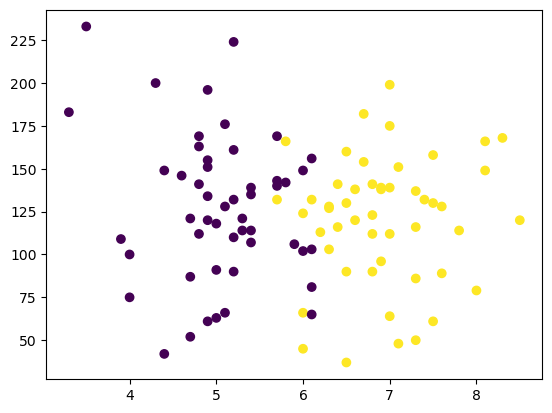

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [9]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [10]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [56]:
X_train

,cgpa,iq
70,6.3,127.0
72,7.3,116.0
56,6.1,65.0
57,6.5,130.0
18,4.0,100.0
...,...,...
35,6.8,90.0
11,6.9,138.0
65,8.1,166.0
78,6.1,81.0


In [57]:
Y_train

70    1
72    1
56    0
57    1
18    0
     ..
35    1
11    1
65    1
78    0
69    1
Name: placement, Length: 90, dtype: int64

In [58]:
X_test

,cgpa,iq
79,6.5,90.0
86,5.1,128.0
32,7.0,139.0
60,6.9,139.0
68,4.0,75.0
5,7.1,48.0
99,6.2,113.0
84,5.7,169.0
33,6.0,149.0
31,3.9,109.0


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
clf=LogisticRegression()

In [61]:
#Model Training
clf.fit(X_train,Y_train)

LogisticRegression()

In [62]:
Y_pred=clf.predict(X_test)
Y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [63]:
Y_test

79    1
86    0
32    1
60    1
68    0
5     1
99    1
84    0
33    0
31    0
Name: placement, dtype: int64

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(Y_test,Y_pred)

0.9

In [66]:
from mlxtend.plotting import plot_decision_regions

C:\Users\91785\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

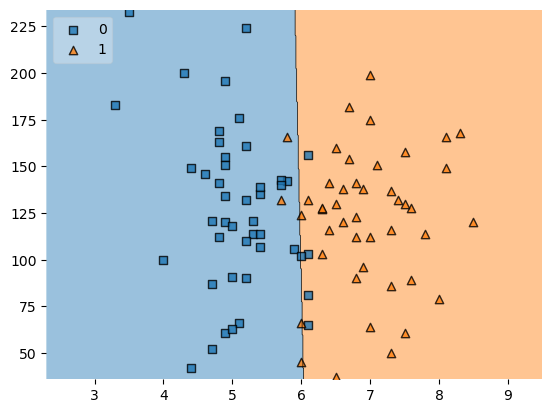

In [67]:
X_train_numpy = X_train.values

plot_decision_regions(X_train_numpy, Y_train.values, clf=clf, legend=2)


In [32]:
import pickle


In [33]:
pickle.dump(clf,open('model.pkl','wb'))